In [3]:
from scipy import linalg as la
from scipy import optimize
import sympy
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
sympy.init_printing()

# 方阵求解

## 计算矩阵的秩、条件数、范数

如给定的方程组：
$$
\large{
\begin{split}
2x_1 + 3x_2 &= 4 \\
5x_1 + 4x_2 &= 23 
\end{split}
}
$$
![image](https://wx4.sinaimg.cn/large/69d4185bly1fy9joic0i8j20g607x0tc.jpg)

```python
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])
A.rank() # 2
```
```python
A.condition_number()
```
$$
\frac{\sqrt{2 \sqrt{170} + 27}}{\sqrt{- 2 \sqrt{170} + 27}}
$$
```python
sympy.N(_) #7.58240137440151
A.norm()
```
$3 \sqrt{6}$

使用 numpy 的方法
```python
In [14]: A = np.array([[2, 3], [5, 4]])
In [15]: b = np.array([4, 3])
In [16]: np.linalg.matrix_rank(A)
Out[16]: 2
In [17]: np.linalg.cond(A)
Out[17]: 7.5824013744
In [18]: np.linalg.norm(A)
Out[18]: 7.34846922835
```

## LU 分解求解法

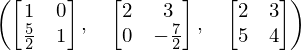

In [21]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])
L, U, _ = A.LUdecomposition()
L,U,L*U

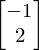

In [13]:
x = A.solve(b); 
x # equivalent to A.LUsolve(b)

使用另外的方法`la.lu`

In [22]:
P, L, U = la.lu(A)
L,U,L*U

(array([[ 1. ,  0. ],
        [ 0.4,  1. ]]), array([[ 5. ,  4. ],
        [ 0. ,  1.4]]), array([[ 5. ,  0. ],
        [ 0. ,  1.4]]))

In [ ]:
# ValueError: object arrays are not supported
la.solve(A, b)

## 数值与符号求解比较

对如下的方程组进行求解：
$$
\large{
\begin{pmatrix}
1 & \sqrt{p} \\
1 & \frac{1}{\sqrt{p}}
\end{pmatrix}\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix} = \begin{pmatrix}
1 \\
2
\end{pmatrix}
}
$$

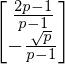

In [26]:
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])
x = A.solve(b)
sympy.simplify(x)

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


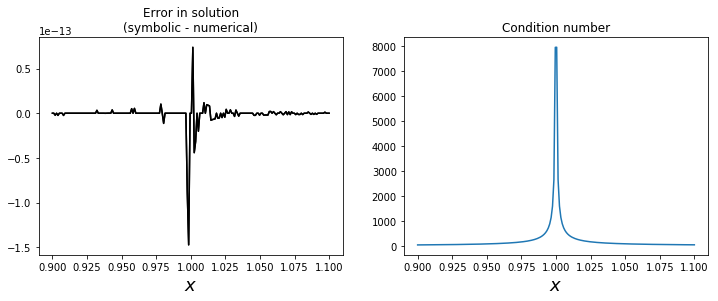

In [28]:
# Symbolic problem specification
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])# Solve symbolically

x_sym_sol = A.solve(b)
Acond = A.condition_number().simplify()

# Numerical problem specification
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

# Graph the difference between the symbolic (exact) and numerical results.
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
p_vec = np.linspace(0.9, 1.1, 200)
for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, 'k')
axes[0].set_title("Error in solution\n(symbolic - numerical)")
axes[0].set_xlabel(r'$x$', fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$x$', fontsize=18)

plt.show()

# 长方形系统

$m \ne n$ 的方程组既可以是欠定的也可以是超定的。当 n > m 是表示欠定的，即方程组数量小于变量的个数，因此解不能完全确定；n < m 表示超定，即方程的数量大于参数的数量，通常没有确定的解。如下面的欠定方程组：
$$
\large{
\begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{pmatrix}\begin{pmatrix}
x_1 \\
x_2 \\
x_3
\end{pmatrix}=\begin{pmatrix}
7 \\
8
\end{pmatrix}
}
$$

如下的求解，使用 $x_3$ 来时表示 $x_1,x_2$

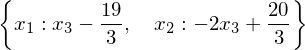

In [29]:
x_vars = sympy.symbols("x_1, x_2, x_3")
A = sympy.Matrix([[1, 2, 3], [4, 5, 6]])
x = sympy.Matrix(x_vars)
b = sympy.Matrix([7, 8])
sympy.solve(A*x - b, x_vars)

## 超定方程近似解

可以使用 SymPy 的 `solve_least_squares` 方法求解，对于数值解可以使用 `la.lstsq`

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


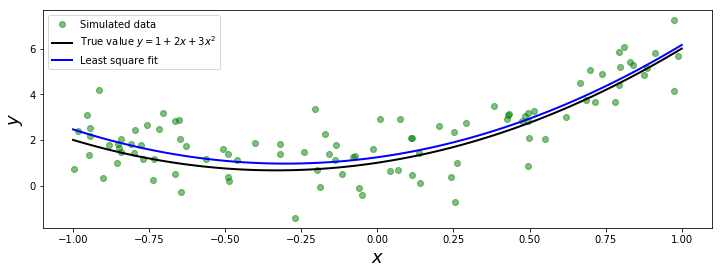

In [30]:
# define true model parameters
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2

# simulate noisy data
m = 100
X = 1 - 2 * np.random.rand(m)
Y = a + b * X + c * X**2 + np.random.randn(m)

# fit the data to the model using linear least square
A = np.vstack([X**0, X**1, X**2]) # see np.vander for alternative
sol, r, rank, s = la.lstsq(A.T, Y)

y_fit = sol[0] + sol[1] * x + sol[2] * x**2
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

plt.show()

**使用不同阶多项式拟合**

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


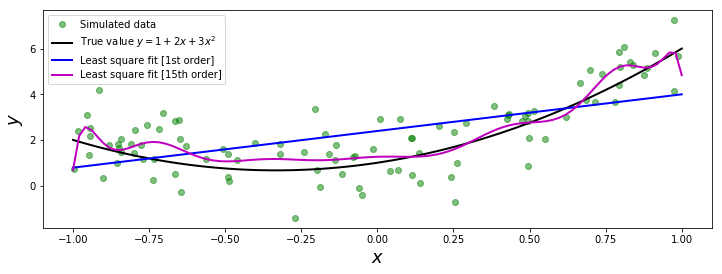

In [31]:
# fit the data to the model using linear least square:
# 1st order polynomial
A = np.vstack([X**n for n in range(2)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit1 = sum([s * x**n for n, s in enumerate(sol)])

# 15th order polynomial
A = np.vstack([X**n for n in range(16)])
sol, r, rank, sv = la.lstsq(A.T, Y)
y_fit15 = sum([s * x**n for n, s in enumerate(sol)])

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit1, 'b', lw=2, label='Least square fit [1st order]')
ax.plot(x, y_fit15, 'm', lw=2, label='Least square fit [15th order]')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)

plt.show()

# 特征值问题

特征值方程 $Ax = \lambda x$，也可以写成 $(A - I\lambda)x = 0$。在 SymPy 中可以使用 `eigenvals`/`eigenvects` 求解。

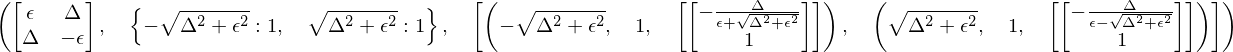

In [32]:
eps, delta = sympy.symbols("epsilon, Delta")
H = sympy.Matrix([[eps, delta], [delta, -eps]])
H, H.eigenvals(), H.eigenvects()

In [33]:
# 两个特征向量正交
(eval1, _, evec1), (eval2, _, evec2) = H.eigenvects()
sympy.simplify(evec1[0].T * evec2[0])

# 非线性方程

线性方程满足：

- $f(x+y)=f(x)+f(y)$,
- $f(ax)=af(x)$,
- $f(ax + by)= af(x)+bf(y)$

## 单变量方程

可以通过 `sympy.solve()`求解

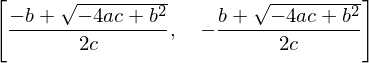

In [34]:
x, a, b, c = sympy.symbols("x, a, b, c")
sympy.solve(a + b*x + c*x**2, x)

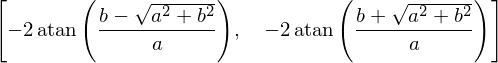

In [35]:
sympy.solve(a * sympy.cos(x) - b * sympy.sin(x), x)

**使用图形判断根的个数**

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


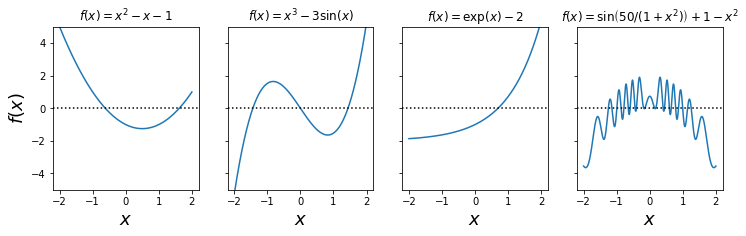

In [36]:
x = np.linspace(-2, 2, 1000)
# four examples of nonlinear functions
f1 = x**2 - x - 1
f2 = x**3 - 3 * np.sin(x)
f3 = np.exp(x) - 2
f4 = 1 - x**2 + np.sin(50 / (1 + x**2))

# plot each function
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f, lw=1.5)
    axes[n].axhline(0, ls=':', color='k')
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].set_xlabel(r'$x$', fontsize=18)

axes[0].set_ylabel(r'$f(x)$', fontsize=18)

titles = [r'$f(x)=x^2-x-1$', r'$f(x)=x^3-3\sin(x)$',
          r'$f(x)=\exp(x)-2$', r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$']
for n, title in enumerate(titles):
    axes[n].set_title(title)

plt.show()

### 二分法求解

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


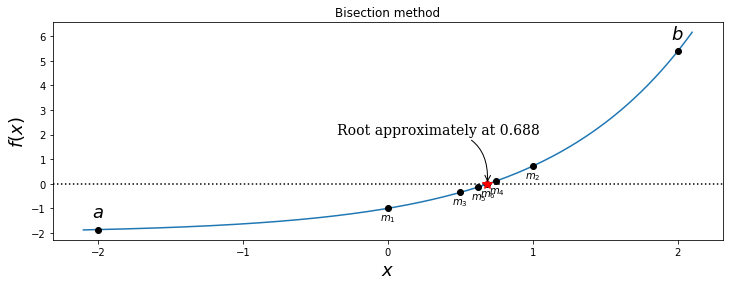

In [37]:
# define a function, desired tolerance and starting interval [a, b]
f = lambda x: np.exp(x) - 2
tol = 0.1
a, b = -2, 2
x = np.linspace(-2.1, 2.1, 1000)

# graph the function f
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)

# find the root using the bisection method and visualize
# the steps in the method in the graph
fa, fb = f(a), f(b)

ax.plot(a, fa, 'ko')
ax.plot(b, fb, 'ko')
ax.text(a, fa + 0.5, r"$a$", ha='center', fontsize=18)
ax.text(b, fb + 0.5, r"$b$", ha='center', fontsize=18)

n = 1
while b - a > tol:
    m = a + (b - a)/2
    fm = f(m)

    ax.plot(m, fm, 'ko')
    ax.text(m, fm - 0.5, r"$m_%d$" % n, ha='center')
    n += 1

    if np.sign(fa) == np.sign(fm):
        a, fa = m, fm
    else:
        b, fb = m, fm

ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Root approximately at %.3f" % m, 
            fontsize=14, family="serif",
            xy=(a, fm), xycoords='data', xytext=(-150, +50), 
            textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Bisection method")
plt.show()

### 牛顿法求解

比二分法收敛更快，它使用一阶泰勒展开式 $f(x + dx)=f(x) + dxf'(x)$，通过迭代$x_{k+1}=x_k - f(x_k)/f'(x_k)$

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


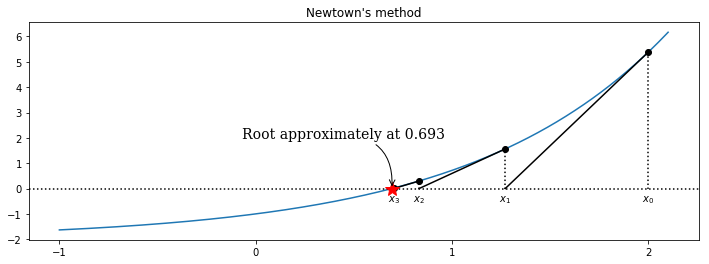

In [38]:
# define a function, desired tolerance and starting point xk
tol = 0.01
xk = 2

s_x = sympy.symbols("x")
s_f = sympy.exp(s_x) - 2

f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x)

x = np.linspace(-1, 2.1, 1000)

# setup a graph for visualizing the root finding steps
fig, ax = plt.subplots(1, 1, figsize=(12,4))

ax.plot(x, f(x))
ax.axhline(0, ls=':', color='k')

# iterate Newton's method until convergence to the desired tolerance has been reached
n = 0
while f(xk) > tol:
    xk_new = xk - f(xk) / fp(xk)

    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-')

    xk = xk_new
    n += 1

ax.plot(xk, f(xk), 'r*', markersize=15)
ax.annotate("Root approximately at %.3f" % xk,
            fontsize=14, family="serif",
            xy=(xk, f(xk)), xycoords='data',
            xytext=(-150, +50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=-.5"))

ax.set_title("Newtown's method")
ax.set_xticks([-1, 0, 1, 2])

plt.show()

### 二分法与牛顿法结合

牛顿法的潜在问题是在每次迭代的过程中要使用函数的和函数导数的值。

二分法和牛顿法是其他优化方法的基础。在 SymPy 中可以使用 `optimize.bisect`和`optimize.newton` 来使用优化的方法来求解。

如二分法示例：
```python
In [63]: optimize.bisect(lambda x: np.exp(x) - 2, -2, 2)
Out[63]: 0.6931471805592082
```

牛顿法示例：
```python
In [64]: x_root_guess = 2
In [65]: f = lambda x: np.exp(x) – 2
In [66]: fprime = lambda x: np.exp(x)
In [67]: optimize.newton(f, x_root_guess) # 不提供导数
Out[67]: 0.69314718056
In [68]: optimize.newton(f, x_root_guess, fprime=fprime) # 提供导数
Out[68]: 0.69314718056
```

## 非线性方程组

多变量非线性方程组需要使用到雅各比矩阵，可以使用 `optimize.fsolve` 和 `optimize.broyden1`/`optimize.broden2`来求解。

如：
```python
In [71]: def f(x):
...:         return [x[1] - x[0]**3 - 2 * x[0]**2 + 1, x[1] + x[0]**2 - 1]
In [72]: optimize.fsolve(f, [1, 1])
Out[72]: array([ 0.73205081, 0.46410162])
```

通过求雅各比矩阵的方式求解

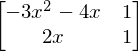

In [39]:
x, y = sympy.symbols("x, y")
f_mat = sympy.Matrix([y - x**3 -2*x**2 + 1, y + x**2 - 1])
f_mat.jacobian(sympy.Matrix([x, y]))

In [40]:
def f_jacobian(x):
    return [[-3*x[0]**2-4*x[0], 1], [2*x[0], 1]]

optimize.fsolve(f, [1, 1], fprime=f_jacobian)

array([ 0.69314718,  0.69314718])

### 牛顿法

在非线性系统中，使用牛顿法初始值非常重要，不同的初始值会得到不同的结果。通过可视化的方法来判断是一个不错的选择。

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


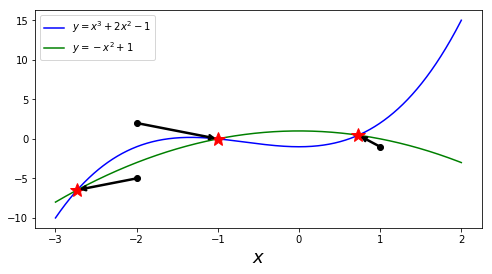

In [41]:
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1, x[1] + x[0]**2 - 1]
# 定义函数
x = np.linspace(-3, 2, 5000)
y1 = x**3 + 2 * x**2 -1
y2 = -x**2 + 1

# 对函数绘图
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y1, 'b', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'g', lw=1.5, label=r'$y = -x^2 + 1$')

# 初始值猜测
x_guesses = [[-2, 2], [1, -1], [-2, -5]]
for x_guess in x_guesses:
    # 依据初始值求解
    sol = optimize.fsolve(f, x_guess)
    ax.plot(sol[0], sol[1], 'r*', markersize=15)
    
    ax.plot(x_guess[0], x_guess[1], 'ko')
    ax.annotate("", xy=(sol[0], sol[1]), xytext=(x_guess[0], x_guess[1]),
                arrowprops=dict(arrowstyle="->", linewidth=2.5))
ax.legend(loc=0)
ax.set_xlabel(r'$x$', fontsize=18)

plt.show()

可视化不同的初始值对最终解的影响，可视化对于理解非线性方程组的解非常重要。

/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


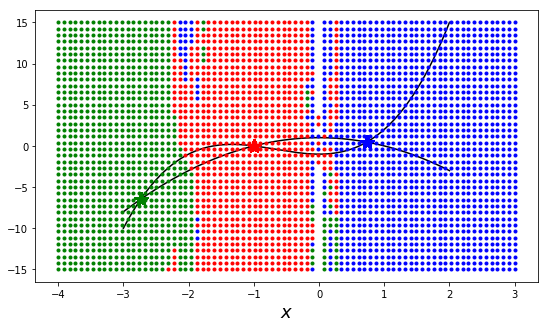

In [44]:
fig, ax = plt.subplots(figsize=(9, 5))

ax.plot(x, y1, 'k', lw=1.5, label=r'$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'k', lw=1.5, label=r'$y = -x^2 + 1$')

sol1 = optimize.fsolve(f, [-2, 2])
sol2 = optimize.fsolve(f, [ 1, -1])
sol3 = optimize.fsolve(f, [-2, -5])

colors = ['r', 'b', 'g']
for m in np.linspace(-4, 3, 80):
    for n in np.linspace(-15, 15, 40):
        x_guess = [m, n]
        sol = optimize.fsolve(f, x_guess)

        for idx, s in enumerate([sol1, sol2, sol3]):
            if abs(s-sol).max() < 1e-8:
                ax.plot(sol[0], sol[1], colors[idx]+'*', markersize=15)
                ax.plot(x_guess[0], x_guess[1], colors[idx]+'.')

ax.set_xlabel(r'$x$', fontsize=18)
plt.show()